# P300 Example

In this notebook, we will be using the SpikerTools library to analyze some P300 data from a session! Let's talk about the data first. This was recorded from one of Backyard Brains' devices using the Spike Recorder app. 

P300 Background:
The P300 signal arises when a subject is exposed to a series of two stimuli (they could be auditory, visual, somatosensory, etc.), such that one (standard stimulus) is more frequent than the other (target stimulus). The subject is told to focus on the target stimulus, and when this stimulus is presented, the P300 signal arises. This is also referred to as the oddball paradigm.

In this data file, when the more frequent/standard stimulus is presented, it is marked by "1" in the events file. The less frequent/ target stimulus is marked by "2".

The goal is to detect the P300 signal present when the target stimulus is presented. Let's get started!

First, we import spikertools. 

In [1]:

import spikertools as sp

Next, we create a Session object using our data file! Just add the path to the filename in the Session() initializer as shown below. 

A Session object stores the data and associated events, and allows you to perform various preprocessing functions (filtering, downsamplling, etc.) and make various plots!

In [2]:
p300 = sp.Session(r"p300_example_data\BYB_Recording_2019-06-11_13.23.58.wav")

First, let's take a look at our data. What does it look like in general? How long is the session? How are the events distributed? These questions can be answered by plotting an overview of the Session using the plot_overview function.

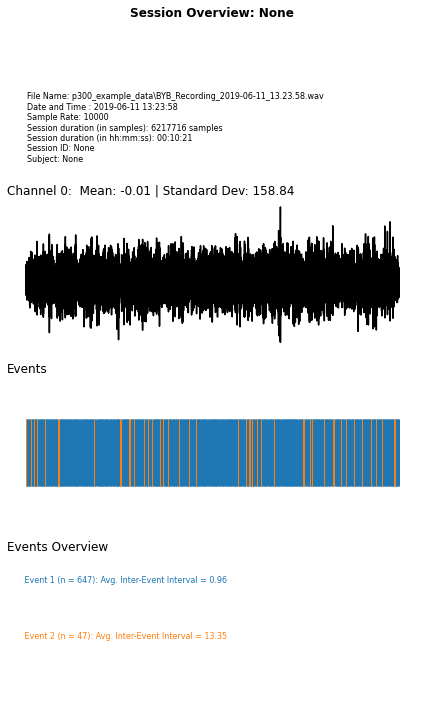

In [3]:
p300.plot_overview()

We can also plot a small interval of the data to see what it looks like with finer detail! The plot_interval function takes two required arguments: the first one is the channel index (here, we care about Channel 0). The second is a tuple with the time bounds. Here, I am plotting between 5 and 7 seconds, so I use (5,7).

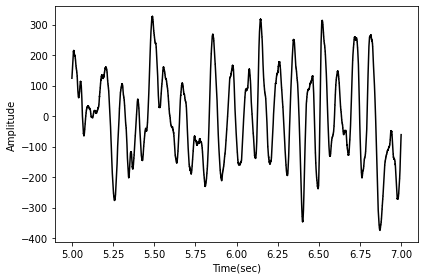

In [4]:
p300.plot_interval(0,(5,7))

Now, to detect the P300 signal, we need to average over the different instances of the target stimulus presentation. This can be easily done with the event-locked average plotting function (plot_elavg). Just specify the event you want to average over (in our case, that would be "2" since this is the target stimulus) and the time window you would like to take around this event (here, I chose from 0 to 1 second after the event since the P300 signal appears 300 ms after stimulus presentation)

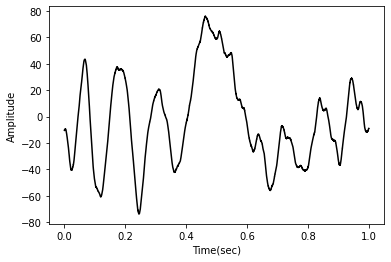

In [5]:
p300.plot_elavg("2", (0,1))

What a peak! Let's see how this compares with the standard stimulus presentation. Repeat the same code, just replace "2" with "1" to denote the standard stimulus. 

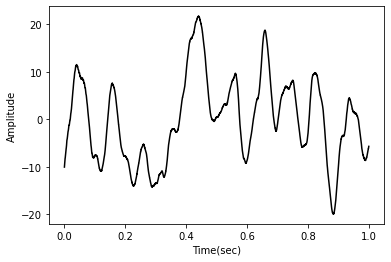

In [6]:
p300.plot_elavg("1", (0,1))

We also see a peak here. Hmmm, that's strange. But wait, look at the amplitude! Clearly the amplitude for the target stimulus is higher than that of the standard stimulus. Let's visualize this by plotting both on the same graph. 

We call the first function as normal, except this time, we add show=False to the parameters. We want to add more to the figure before we show it!

Next, call the second function. Here, you set show=True (It is already like this by default, I'm just showing it here for clarity), but make to set a new parameter makefig = False. When it is set to False, it prevents a new figure from forming, which is what we are looking for! We do not want a new figure, we want to plot on top of the previous one.
And Voila!

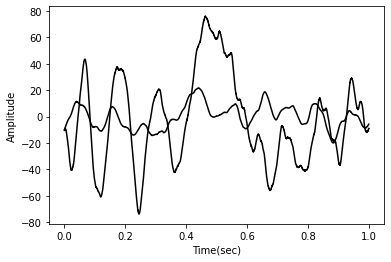

In [7]:
p300.plot_elavg("1", (0,1), show=False)
p300.plot_elavg("2", (0,1), show=True, makefig=False)


Here, we can clearly see the peaks of the P300 signal with the target stimulus exceeding the peaks of the standard stimulus. Yay! We did it. 